In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

NUM_CLASSES = 4  # k parametro
NUM_FEATURES = 2


In [4]:
def euclidean(sample,center):
    return np.sqrt(distance.euclidean(sample,center))

def nearest_center(sample,centers):
    distances = []
    for i in range(len(centers)):
        distances.append(euclidean(sample,centers[i]))
    return np.argmin(distances)

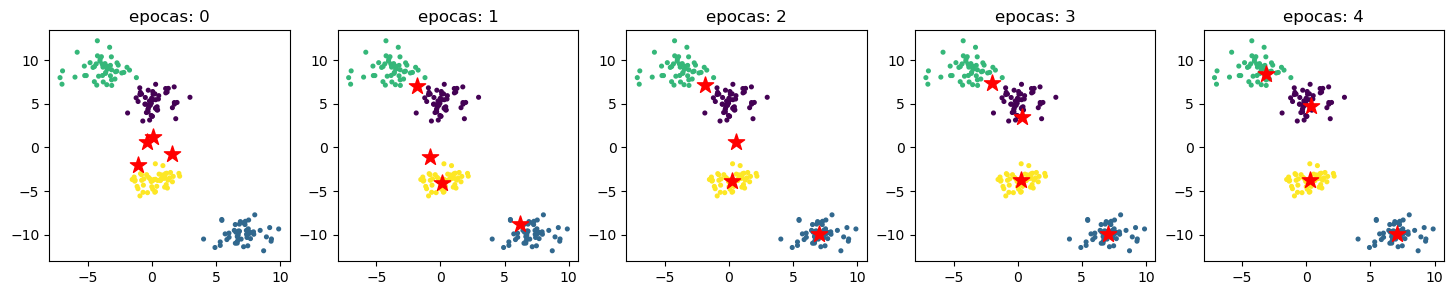

In [8]:
X,y = make_blobs(n_samples=200,n_features=NUM_FEATURES,
                 centers=NUM_CLASSES,random_state=14)
fig,axs = plt.subplots(1,5,figsize=(18,3))
#generando centroides aleatorios
centers = np.random.randn(NUM_CLASSES,2)
#centroides mejores cuando son menores que epsilon
for epoch,ax in zip(range(5),axs):     
    ax.scatter(X[:,0], X[:,1], c= y, s=7)  
    ax.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)    
    ax.set_title('epocas: '+format(epoch))
    
    sum_n_class = np.zeros((NUM_CLASSES,2))
    total_n_class = np.zeros((NUM_CLASSES,1))
    
    for i in range(len(X)):
        center = nearest_center(X[i],centers)
        # agregar una nueva muestra a este recuento de centros
        total_n_class[center] += 1             
        sum_n_class[center][0] += X[i][0]   # nueva coordenada del centroide
        sum_n_class[center][1] += X[i][1]

    for center in range(NUM_CLASSES):       # Reasignando centros
        if total_n_class[center] > 0:
           centers[center][0] = sum_n_class[center][0] / total_n_class[center]
           centers[center][1] = sum_n_class[center][1] / total_n_class[center]
        else:
           centers[center] = np.random.randn(2)

plt.show()
